# Count Cell types

In this notebook, we will see how we can collect summary statistics (SS) from Morpheus logger file. The SS that we are interested in will be to count the occurrence of different cell types.

To do so, we will use the function `count_cell_types()`. This function takes `morpheus_log_file` as a parameter and return the number of occurrences of each cell types. The function also asks for time step between the time points. This should be the same as specified in the logger file. Also, the `field_of_interest` should be described. This field should contain the necessary information about different cell types. In addition, the `cell_types_list` should be specified, which is a list that contains the cell types that we are interested in. Finally, specifying the time symbol used in the Morpheus model (default value will be 't'). 

Let's first start by using a simple example. Let's create a sample logger file in a CSV format:


In [1]:
import csv
import tempfile
import os

full_path=os.path.join(tempfile.gettempdir(), "logger.csv")

csvfile=open(full_path,'w', newline='')
obj=csv.writer(csvfile, delimiter='\t')
obj.writerow(['t', 'cell.id', 'RNA_concentration', 'cell_type'])
obj.writerow(['0', '1', '0.1' ,'0'])
obj.writerow(['0', '2', '0.2' ,'0'])
obj.writerow(['0', '3', '0.3' ,'0'])
obj.writerow(['1', '4', '0.4' ,'1'])
obj.writerow(['1', '5', '0.5' ,'2'])
obj.writerow(['1', '6', '0.6' ,'1'])
obj.writerow(['2', '7', '0.7' ,'2'])
obj.writerow(['2', '8', '0.8' ,'3'])
obj.writerow(['2', '9', '0.9' ,'2'])
csvfile.close()

As we can see from the above example, the time step between time points is =`1`. IF we didn't specify the time_step, then the value will be calculated form the Morpheus file.

In [2]:
t_step=1

and the time symbol that was used in the model is =`t`. The time symbol by default is 't'. So, even if we didn't specify the time point here, the code will run fine. 

In [3]:
t_symbol ='t'

and the `field_of_interest` will be =`cell_type`

In [4]:
field_of_interest = 'cell_type'

Finally, let's create a list of cell types that we are interested in. We have in the above file four different cell type (0, 1, 2, 3). However, let's assume that we are interested only on three of them (1, 2, 3)

In [5]:
cell_types_list = [1, 2, 3]

Now, we are ready to call the function `count_cell_types()`, but before that, let's import the function's library. Don't forget to install the package first.

In [6]:
import fitmulticell.sumstat.cell_types_cout as cs

We also need to import `util` library form fitmulticell to read the CSV file as pandas df

In [7]:
import fitmulticell.util as util

No, we will read the CSV file using the `tsv_to_df` function form the external library

In [8]:
logger_file = util.tsv_to_df("/tmp")

Let's see how the logger_file loks like

In [9]:
logger_file

t  cell.id  RNA_concentration  cell_type
0  0        1                0.1          0
1  0        2                0.2          0
2  0        3                0.3          0
3  1        4                0.4          1
4  1        5                0.5          2
5  1        6                0.6          1
6  2        7                0.7          2
7  2        8                0.8          3
8  2        9                0.9          2

Now, let's call the method.

In [10]:
cell_type_result=cs.count_cell_types(logger_file, field_of_interest, cell_types_list, time_symbol=t_symbol)
print(f'The cell types counts for all time points is =\n {cell_type_result}')

The cell types counts for all time points is =
 {0:            n_cells
cell_type         
1                0
2                0
3                0, 1:            n_cells
cell_type         
1                2
2                1
3                0, 2:            n_cells
cell_type         
1                0
2                2
3                1}


As the output shows, the result will be a dictionary of dataframes.  The outer keys specify the time point, whereas the inner key specifies the cell type. the value of the inner dataframe describes the number of occurrence of the cell type at the specific time point

Now, after calculating the occurrence of the different cell types, let's try to plot the result. To do so, we will use a function that was built for this purpose. the function called `plot_different_cell_type()`.

This function takes the output of the `count_cell_types()` function, the `cell_types_list`, and the `time_step` (optional) as an inputs. In addition, the output of this function will be the axis of the plot. 

Before using the function, let's import it first.

In [13]:
import fitmulticell.sumstat.plot_sumstat as pss

Let's now use the function:

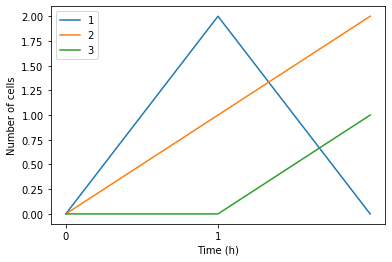

In [14]:
ax = pss.plot_different_cell_type(cell_type_result,cell_types_list)

As the figure illustrates, the occurrence of different cell types can be seen at different time points.